### Decision Tree Heart Predict Model

### 1. Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

### 2. Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Maftuna\Downloads\heart (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df['target'].unique().tolist()

[1, 0]

In [24]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### 3. Data preparing 

In [25]:
x = df.drop('target', axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


### 4. Model training

In [26]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [29]:
print(model.classes_)


[0 1]


[Text(0.5733173076923077, 0.95, 'x[2] <= 0.5\ngini = 0.495\nsamples = 242\nvalue = [109, 133]\nclass = 1'),
 Text(0.31490384615384615, 0.85, 'x[11] <= 0.5\ngini = 0.413\nsamples = 110\nvalue = [78, 32]\nclass = 0'),
 Text(0.4441105769230769, 0.8999999999999999, 'True  '),
 Text(0.1875, 0.75, 'x[8] <= 0.5\ngini = 0.498\nsamples = 53\nvalue = [25, 28]\nclass = 1'),
 Text(0.07692307692307693, 0.65, 'x[12] <= 2.5\ngini = 0.302\nsamples = 27\nvalue = [5, 22]\nclass = 1'),
 Text(0.038461538461538464, 0.55, 'x[4] <= 316.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]\nclass = 1'),
 Text(0.019230769230769232, 0.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = 1'),
 Text(0.057692307692307696, 0.45, 'x[7] <= 163.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.038461538461538464, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.07692307692307693, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.11538461538461539, 0.55, 'x[6] <= 0.5\ng

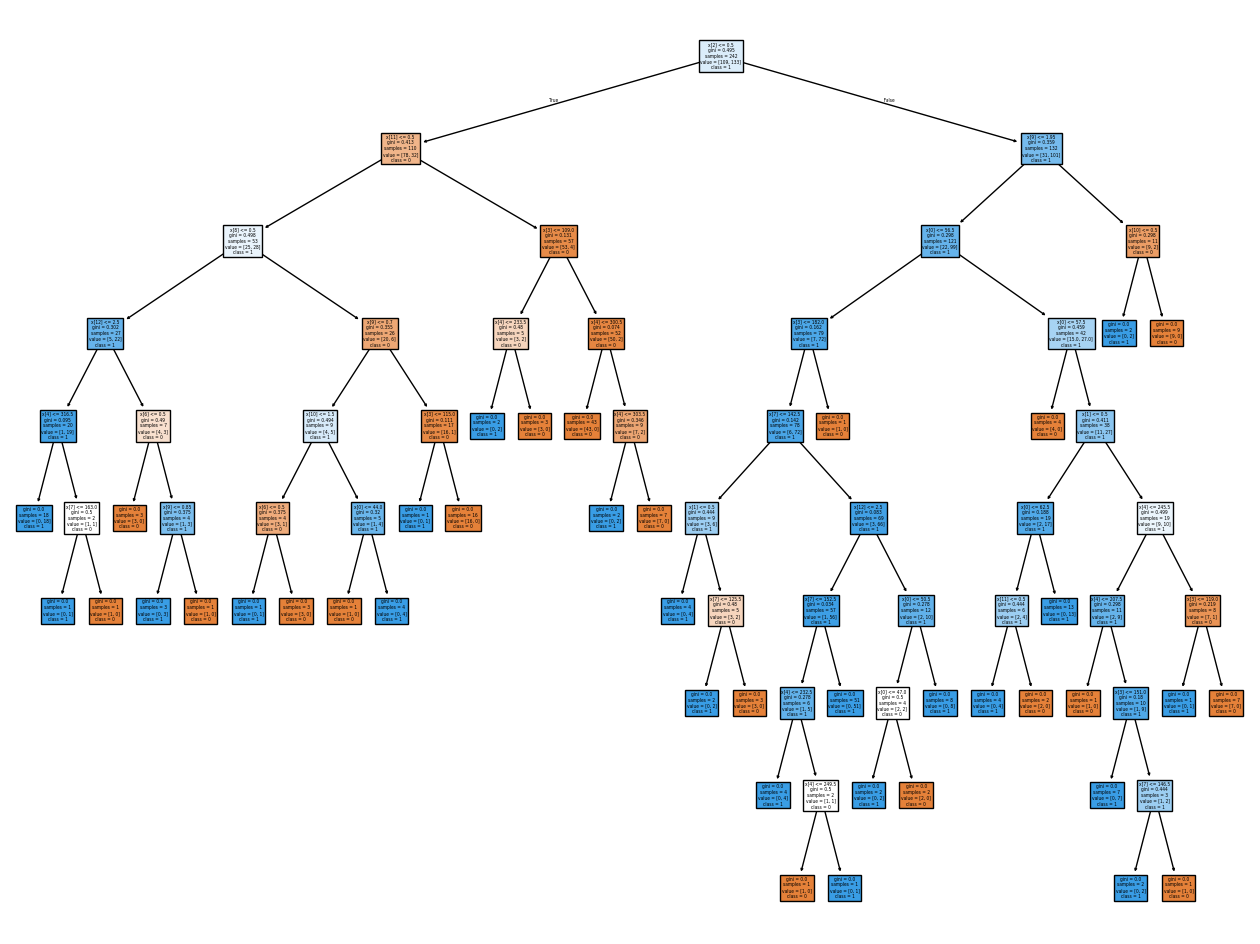

In [31]:
plt.figure(figsize=(16,12))
plot_tree(model, class_names=['0','1'], filled=True)

### 5. Prediction

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Aniqlilik: ", accuracy)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nKlassifikatsiya Xisoboti:")
print(classification_report(y_test, y_pred))

Aniqlilik:  0.8360655737704918
Confusion Matrix
[[27  2]
 [ 8 24]]

Klassifikatsiya Xisoboti:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



Text(70.72222222222221, 0.5, 'Bashorat')

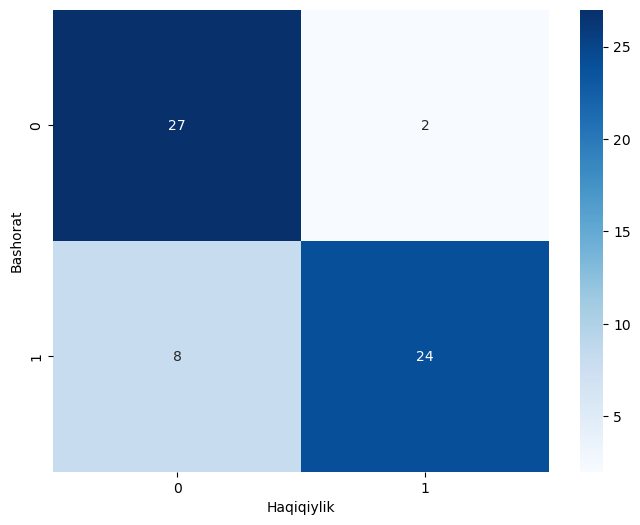

In [38]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues' )
plt.xlabel("Haqiqiylik")
plt.ylabel("Bashorat")

## Lightlgb model

In [4]:
import lightgbm as lgb

x = df.drop('target', axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [5]:
model = lgb.LGBMClassifier()
model

LGBMClassifier()

In [7]:
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [8]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8360655737704918